In [1]:
from event_generator import Events

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
def plot(events):
    fig, ax = plt.subplots(figsize=(20,1))
    plt.plot(events, np.zeros_like(events), 'or', marker='|', markersize=15)
    xfmt = mdates.DateFormatter('%d-%m-%y %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_yticklabels([])
    plt.grid()
#     plt.savefig("examples/example1.png", bbox_inches='tight')
    plt.show()

In [3]:
def sin_signal(t, period1, period2, phase=0, m=1):
    period = period1 + period2
    return 1-m*(1-np.sin(2*np.pi*t/period+phase))

def pulse_wave(t, period1, period2, phase=0):
    return (t-phase)%(period1+period2)>period1

def one(t, *args):
    return 1

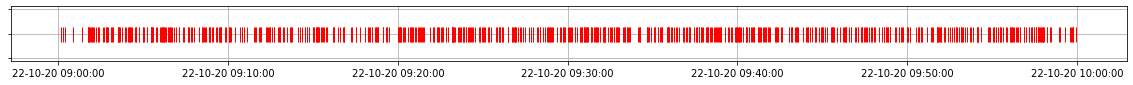

In [4]:
a = Events(1/5, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], one, 23, 50)
plot(a.events)
evnts = np.array(a.events_in_seconds)

# Проверка пуассоновости событий

Времена между событиями подчиняются экспоненциальному распределению $Exp(\lambda)$

Для $Exp(\lambda)\;\;$: $\displaystyle\mathbb{E}[X^n]=\frac{n!}{\lambda^n}$

$\displaystyle\lambda_n=\sqrt[n]{\frac{n!}{\mathbb{E}[X^n]}}$


In [5]:
import random
from IPython.display import HTML, display
import tabulate
from event_generator import Check_Poissoness

m0 = []
m1 = []
m2 = []
m3 = []
for n in range(5):
    m = random.random()*100
    a = Events(1/5, [['2020-10-22 08:15:27.243860','2020-10-22 08:27:00.713311']], one, 300, 100)
    l0, l1, l2, l3 = Check_Poissoness(a)
    m0.append(l0)
    m1.append(l1)
    m2.append(l2)
    m3.append(l3)

table = [["m", *m0],
         ["$\lambda_1$",*m1],
         ["$\lambda_2$",*m2],
         ["$\lambda_3$",*m3]]
table = map(list, zip(*table)) #транспонирование
display(HTML(tabulate.tabulate(table, tablefmt='html')))

m,$\lambda_1$,$\lambda_2$,$\lambda_3$
0.2,0.29494654045111085,0.3168525398172406,0.3468322331037764
0.2,0.29090026022194854,0.3334696332604981,0.3738156379779389
0.2,0.30373658555218946,0.3483618347962971,0.3945413760446531
0.2,0.29474950226789814,0.32338047156368677,0.3555150356543026
0.2,0.2692377441380579,0.31014511186216454,0.3511477098875863


# Pulse wave

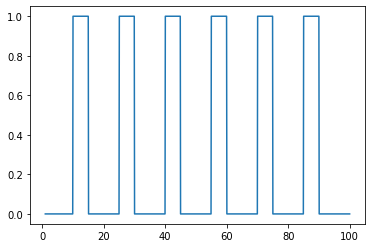

In [6]:
x = np.linspace(1, 100, 1000)
plt.plot(x, pulse_wave(x, 10, 5))
plt.show()

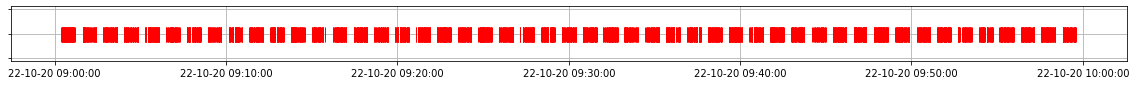

In [7]:
a = Events(1, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], pulse_wave, 23, 50)
plot(a.events)
evnts = np.array(a.events_in_seconds)

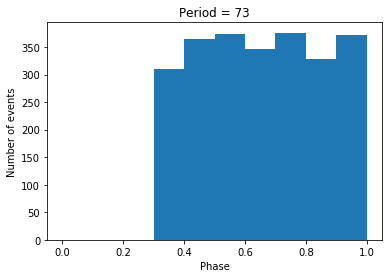

In [8]:
period = 73
n, bins, patches = plt.hist(evnts%period/period, 10, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

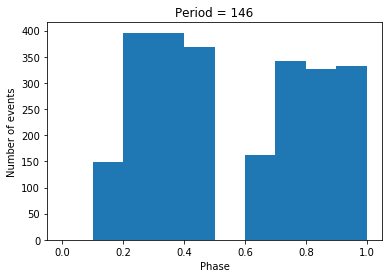

In [9]:
period = 2*73
n, bins, patches = plt.hist(evnts%period/period, 10, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

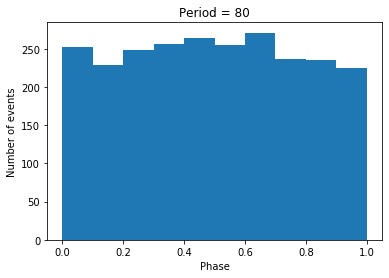

In [10]:
period = 80
n, bins, patches = plt.hist(evnts%period/period, 10, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()


# Сигнал сложной формы

In [4]:
def sin_signal(t, period1, period2, phase=0, m=0.3):
    period = period1 + period2
    return 1-m*(1-np.sin(2*np.pi*t/period+phase))

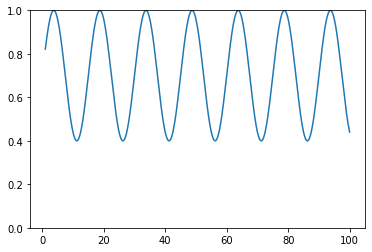

In [12]:
x = np.linspace(1, 100, 1000)
plt.plot(x, sin_signal(x, 10, 5))
plt.ylim(0, 1)
plt.show()

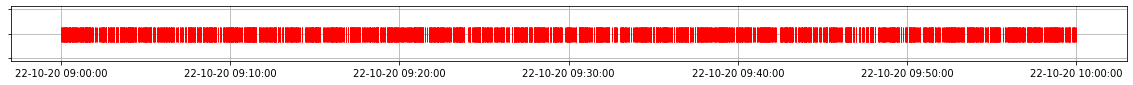

In [13]:
a = Events(1, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], sin_signal, 23, 50)
plot(a.events)
evnts = np.array(a.events_in_seconds)
evnts_sin = evnts

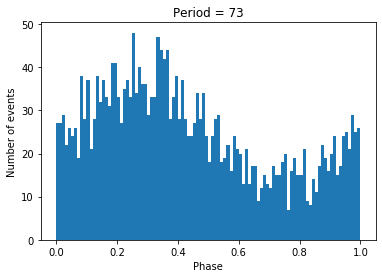

In [14]:
period = 73
n, bins, patches = plt.hist(evnts%period/period, 100, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

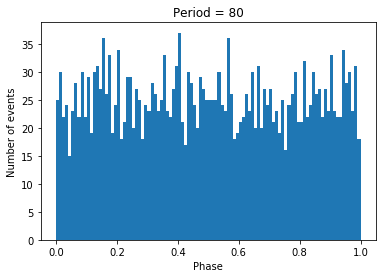

In [15]:
period = 80
n, bins, patches = plt.hist(evnts%period/period, 100, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

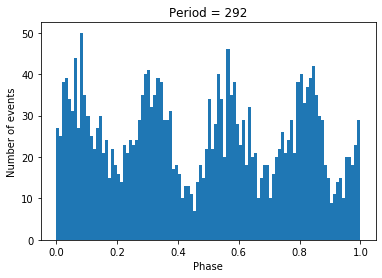

In [16]:
period = 73*4
n, bins, patches = plt.hist(evnts%period/period, 100, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

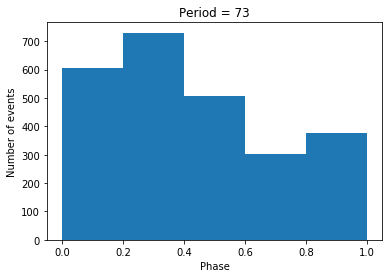

[605. 730. 507. 304. 378.]


232.08954041204436

In [17]:
period = 73
n, bins, patches = plt.hist(evnts%period/period, 5, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()
print(n)
e = sum(n)/5
np.sum((n-e)**2/e)

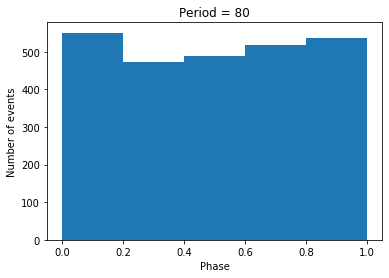

[551. 472. 490. 518. 538.]


8.37057220708447

In [19]:
period = 80
n, bins, patches = plt.hist(evnts%period/period, 5, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()
print(n)
e = sum(n)/5
np.sum((n-e)**2/e)

# Поиск периодичностей

In [5]:
from search_period import periods_statistic, chi_2, fold

In [19]:
per, stat = periods_statistic(evnts_sin, chi_2, fold, 5, 10, 200)

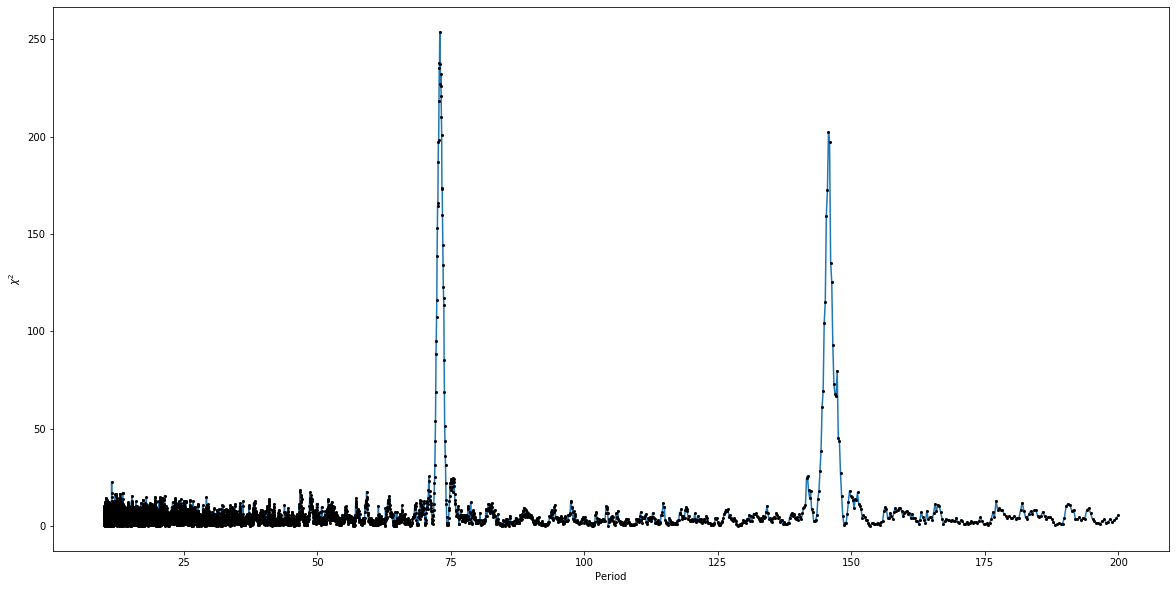

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(per, stat)
plt.plot(per, stat, 'ko', markersize=2)
plt.xlabel('Period')
plt.ylabel('$\chi^2$')
plt.show()

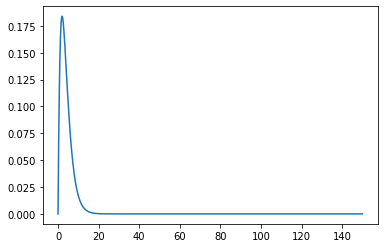

0.1504926025852329

In [23]:
from scipy.stats import chi2
x = np.linspace(0, 150, 1000)
plt.plot(x, chi2.pdf(x,4))
plt.show()
chi2.pdf(stat[171],4)

In [24]:
per[np.argmax(stat)]
np.max(stat)
stat[171]

3.547683923705722

In [25]:
per, stat = periods_statistic(evnts, chi_2, fold, 5, 10, 200)

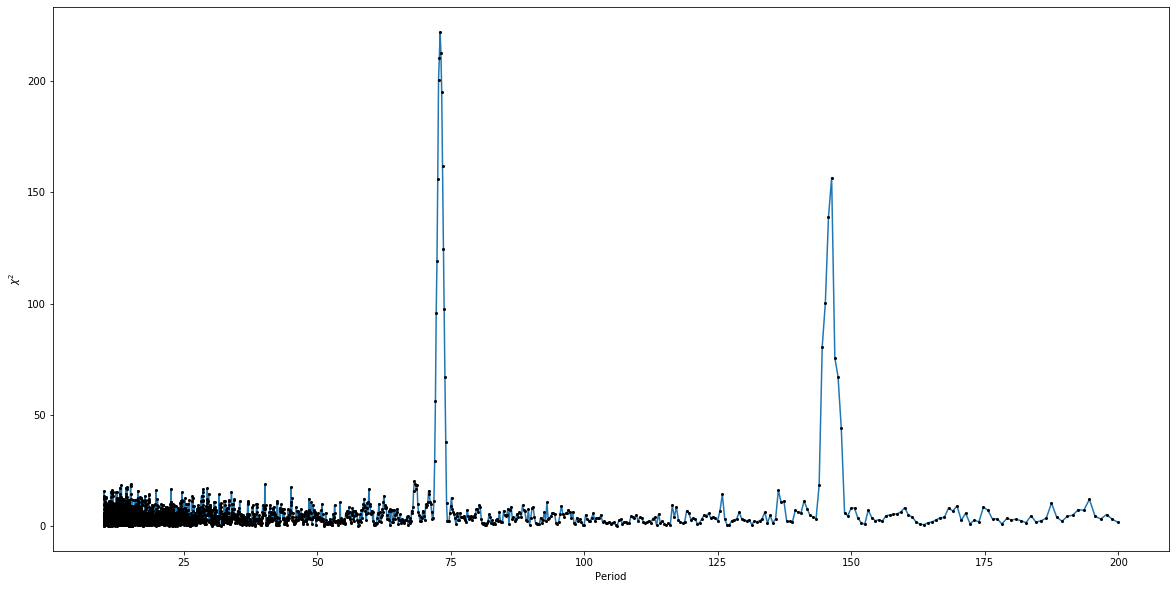

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(per, stat)
plt.plot(per, stat, 'ko', markersize=2)
plt.xlabel('Period')
plt.ylabel('$\chi^2$')
plt.show()

In [6]:
time_intervals = [['2020-11-20 22:00:00.000000','2020-11-21 02:00:00.000000'],
['2020-11-21 22:00:00.000000','2020-11-22 02:00:00.000000'],
['2020-11-22 22:00:00.000000','2020-11-23 02:00:00.000000'],
['2020-11-23 22:00:00.000000','2020-11-24 02:00:00.000000'],
['2020-11-24 22:00:00.000000','2020-11-25 02:00:00.000000'],
['2020-11-25 22:00:00.000000','2020-11-26 02:00:00.000000'],
['2020-11-26 22:00:00.000000','2020-11-27 02:00:00.000000'],
['2020-11-27 22:00:00.000000','2020-11-28 02:00:00.000000'],
['2020-11-28 22:00:00.000000','2020-11-29 02:00:00.000000'],
['2020-11-29 22:00:00.000000','2020-11-30 02:00:00.000000'],
['2020-12-01 22:00:00.000000','2020-12-02 02:00:00.000000'],
['2020-12-02 22:00:00.000000','2020-12-03 02:00:00.000000'],
['2020-12-03 22:00:00.000000','2020-12-04 02:00:00.000000'],
['2020-12-04 22:00:00.000000','2020-12-05 02:00:00.000000'],
['2020-12-05 22:00:00.000000','2020-12-06 02:00:00.000000'],
['2020-12-06 22:00:00.000000','2020-12-07 02:00:00.000000'],
['2020-12-07 22:00:00.000000','2020-12-08 02:00:00.000000'],
['2020-12-08 22:00:00.000000','2020-12-09 02:00:00.000000'],
['2020-12-09 22:00:00.000000','2020-12-10 02:00:00.000000'],
['2020-12-10 22:00:00.000000','2020-12-11 02:00:00.000000'],
['2020-12-11 22:00:00.000000','2020-12-12 02:00:00.000000'],
['2020-12-12 22:00:00.000000','2020-12-13 02:00:00.000000'],
['2020-12-13 22:00:00.000000','2020-12-14 02:00:00.000000'],
['2020-12-14 22:00:00.000000','2020-12-15 02:00:00.000000'],
['2020-12-15 22:00:00.000000','2020-12-16 02:00:00.000000'],
['2020-12-16 22:00:00.000000','2020-12-17 02:00:00.000000'],
['2020-12-17 22:00:00.000000','2020-12-18 02:00:00.000000'],
['2020-12-18 22:00:00.000000','2020-12-19 02:00:00.000000'],
['2020-12-19 22:00:00.000000','2020-12-20 02:00:00.000000'],
['2020-12-20 22:00:00.000000','2020-12-21 02:00:00.000000'],
['2020-12-21 22:00:00.000000','2020-12-22 02:00:00.000000'],
['2020-12-22 22:00:00.000000','2020-12-23 02:00:00.000000'],
['2020-12-23 22:00:00.000000','2020-12-24 02:00:00.000000'],
['2020-12-24 22:00:00.000000','2020-12-25 02:00:00.000000'],
['2020-12-25 22:00:00.000000','2020-12-26 02:00:00.000000'],
['2020-12-26 22:00:00.000000','2020-12-27 02:00:00.000000'],
['2020-12-27 22:00:00.000000','2020-12-28 02:00:00.000000'],
['2020-12-28 22:00:00.000000','2020-12-29 02:00:00.000000'],
['2020-12-29 22:00:00.000000','2020-12-30 02:00:00.000000'],
['2020-12-30 22:00:00.000000','2020-12-31 02:00:00.000000']]

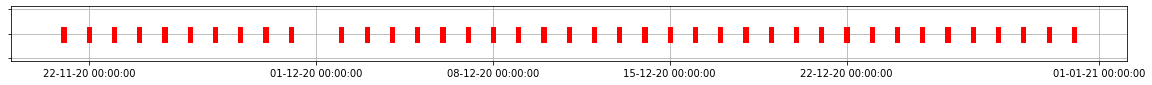

In [7]:
a = Events(1, time_intervals, sin_signal, 0, 10*24*3600)
plot(a.events)
evnts = np.array(a.events_in_seconds)

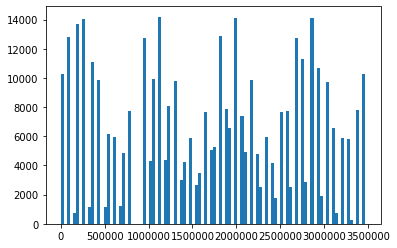

In [8]:
n, bins, patches = plt.hist(evnts, 100)

In [59]:
for i in range(10, 31):
    a = "['2020-12-" + str(i)+ " 22:00:00.000000'"
    b = ",'2020-12-" + str(i+1)+ " 02:00:00.000000'],"
    print(a+b)

['2020-12-10 22:00:00.000000','2020-12-11 02:00:00.000000'],
['2020-12-11 22:00:00.000000','2020-12-12 02:00:00.000000'],
['2020-12-12 22:00:00.000000','2020-12-13 02:00:00.000000'],
['2020-12-13 22:00:00.000000','2020-12-14 02:00:00.000000'],
['2020-12-14 22:00:00.000000','2020-12-15 02:00:00.000000'],
['2020-12-15 22:00:00.000000','2020-12-16 02:00:00.000000'],
['2020-12-16 22:00:00.000000','2020-12-17 02:00:00.000000'],
['2020-12-17 22:00:00.000000','2020-12-18 02:00:00.000000'],
['2020-12-18 22:00:00.000000','2020-12-19 02:00:00.000000'],
['2020-12-19 22:00:00.000000','2020-12-20 02:00:00.000000'],
['2020-12-20 22:00:00.000000','2020-12-21 02:00:00.000000'],
['2020-12-21 22:00:00.000000','2020-12-22 02:00:00.000000'],
['2020-12-22 22:00:00.000000','2020-12-23 02:00:00.000000'],
['2020-12-23 22:00:00.000000','2020-12-24 02:00:00.000000'],
['2020-12-24 22:00:00.000000','2020-12-25 02:00:00.000000'],
['2020-12-25 22:00:00.000000','2020-12-26 02:00:00.000000'],
['2020-12-26 22:00:00.00

In [9]:
x = np.array(a.events_in_seconds)
y = sin_signal(np.array(a.events_in_seconds),0, 11*24*3600)

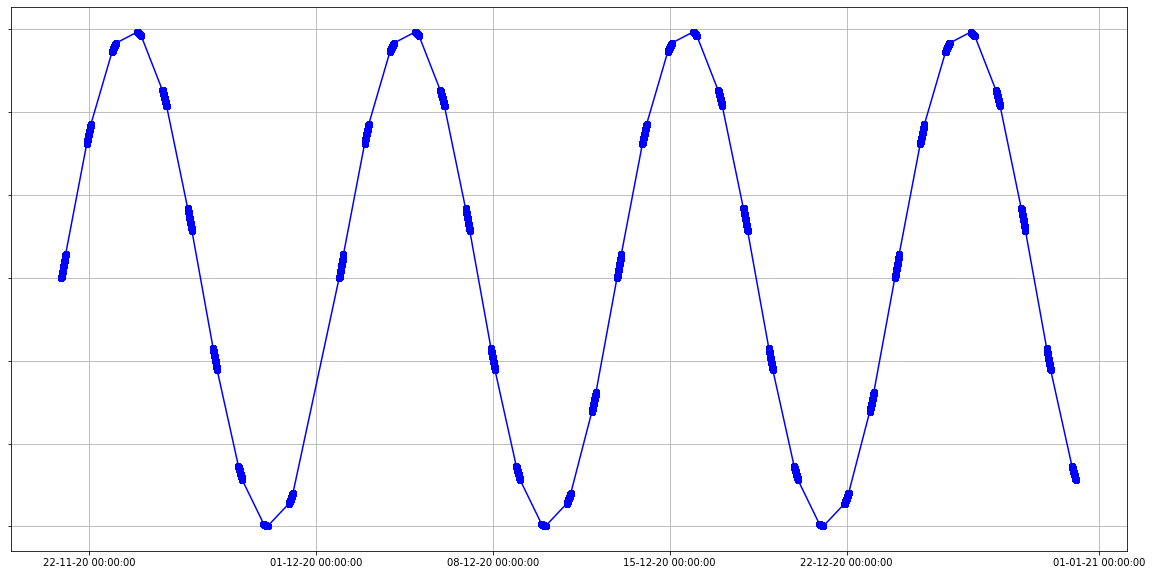

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(a.events, y,'bo-')
xfmt = mdates.DateFormatter('%d-%m-%y %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
ax.set_yticklabels([])
plt.grid()
plt.show()

In [27]:
folded = fold(evnts, 11*24*3600, 10)

In [11]:
per, stat = periods_statistic(evnts, chi_2, fold, 5, 10*24*3600, 12*24*3600)

KeyboardInterrupt: 

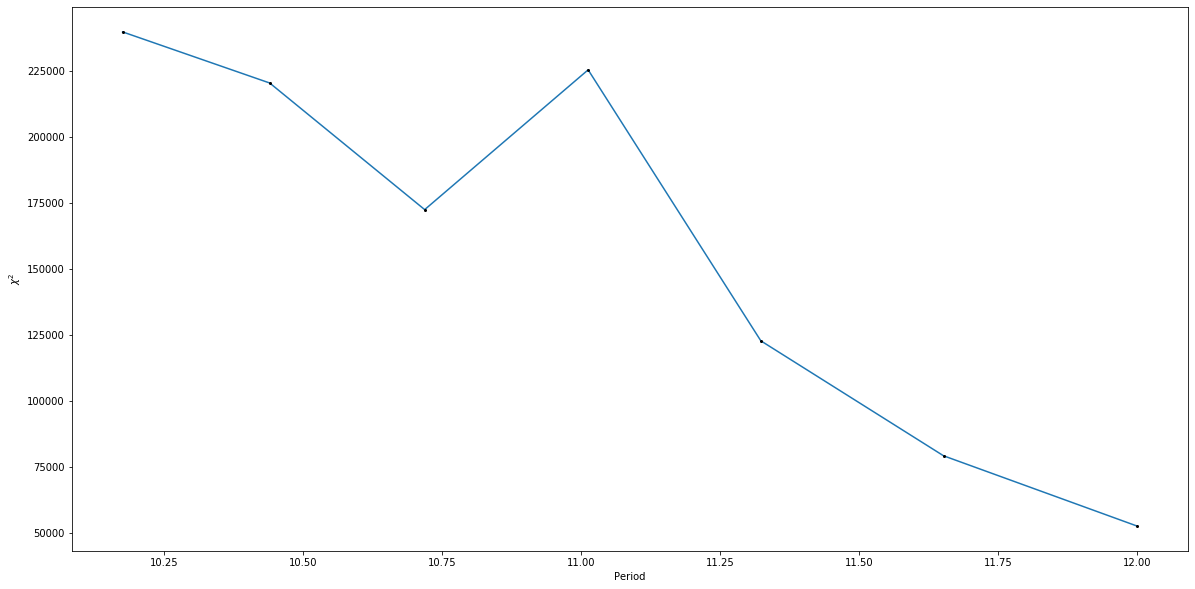

In [124]:
peri = np.array(per)/(24*3600)
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(peri, stat)
plt.plot(peri, stat, 'ko', markersize=2)
plt.xlabel('Period')
plt.ylabel('$\chi^2$')
plt.show()

In [129]:
1/(evnts[-1]-evnts[0])

2.8818420088114346e-07

In [62]:
import numpy as np


def fold(events, period, bins):
    x = np.sort(events % period/period)
    folded = np.array([np.count_nonzero(x//(1/bins) == i)
                       for i in range(bins)])
    return folded


def chi_2(evnts, fold, periods, bins):
    folded = fold(evnts, periods, bins)
    expected = np.sum(folded, axis=1)/bins
#     chi_square = 0
#     for f in folded:
#         chi_square += (f-expected)**2/expected  # доабвить долю экспозиции
    chi_square = np.sum((folded - expected)**2/expected)
    return chi_square

def exposure(intervals, period, bins):
    pass

def periods_statistic1(evnts, chi_2, fold, bins, pmin, pmax, n_steps=1000):
    freq = np.linspace(1/pmax, 1/pmin, n_steps)
    periods = 1/freq[::-1]
    stat = chi_2(evnts, fold, periods, bins)
#     stat = np.array([chi_2(evnts, fold, i, bins) for i in periods])

    return periods, stat


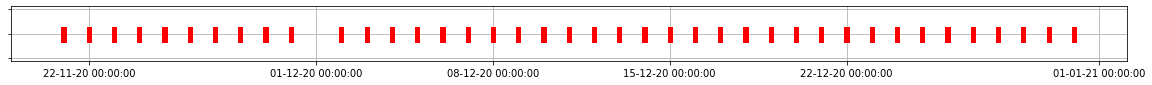

In [50]:
a = Events(1, time_intervals, sin_signal, 0, 11*24*3600)
plot(a.events)
evnts = np.array(a.events_in_seconds)

In [60]:
per, stat = periods_statistic1(evnts, chi_2, fold, 5, 5*24*3600, 15*24*3600)

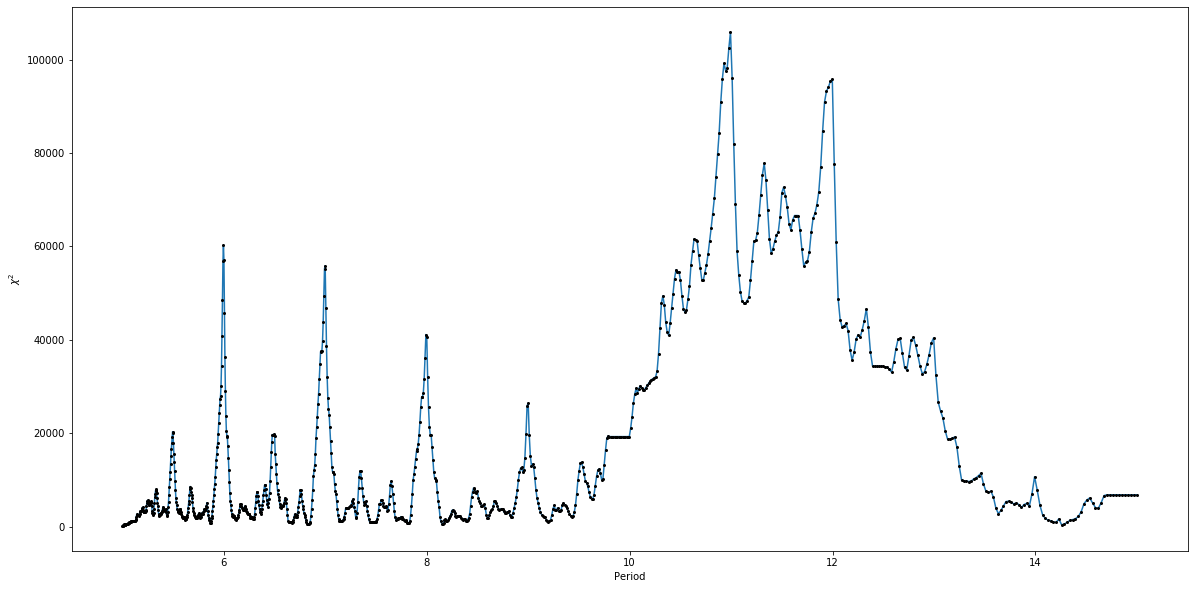

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(np.array(per)/(3600*24), stat)
plt.plot(np.array(per)/(3600*24), stat, 'ko', markersize=2)
plt.xlabel('Period')
plt.ylabel('$\chi^2$')
plt.show()

In [42]:
f = np.array([1,1/2,1/3,1/4,1/5])
1/f

array([1., 2., 3., 4., 5.])